In [1]:
# CaAs_Verindra Hernanda Putra - 1303223055

# Import Library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# **LEVEL 1 - EP**

membuat lineplot untuk membandingkan naik dan turunnya nilai IPG221A2N perbulan antara tahun 2015, 2016, dan 2017

In [2]:
# Panggil Dataset
df_EP = pd.read_csv("/kaggle/input/level1-ep/EP.csv")

In [3]:
df_EP

,DATE,IPG2211A2N
0,2015-01-01,120.2696
1,2015-02-01,116.3788
2,2015-03-01,104.4706
3,2015-04-01,89.7461
4,2015-05-01,91.0930
5,2015-06-01,102.6495
6,2015-07-01,111.6354
7,2015-08-01,110.5925
8,2015-09-01,101.9204
9,2015-10-01,91.5959


ANALISIS KOLOM

* **IPG2211A2N :** Energi_Listrik
* **DATE :** Tanggal_Produksi

In [4]:
# Cek Tipe Data
df_EP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        36 non-null     object 
 1   IPG2211A2N  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [5]:
# Ubah tipe data
df_EP['DATE'] = pd.to_datetime(df_EP['DATE'])

# Tambah kolom di index baru
df_EP['Tahun'] = pd.DatetimeIndex(df_EP['DATE']).year
df_EP['Bulan'] = pd.DatetimeIndex(df_EP['DATE']).month

# Ubah tipe data
df_EP['Bulan'] = df_EP['Bulan'].astype(str)

# Ganti nama kolom
df_EP = df_EP[['Tahun', 'Bulan', 'IPG2211A2N']]

In [6]:
# Ambil Tahun 2015
df_2015 = df_EP[df_EP['Tahun'] == 2015]
df_2015 = df_2015.drop(columns = 'Tahun', axis=1)
df_2015.columns = ['Bulan', 'IPG_2015']

# Ambil Tahun 2016
df_2016 = df_EP[df_EP['Tahun'] == 2016]
df_2016 = df_2016.drop(columns = 'Tahun', axis=1)
df_2016.columns = ['Bulan', 'IPG_2016']

# Ambil Tahun 2017
df_2017 = df_EP[df_EP['Tahun'] == 2017]
df_2017 = df_2017.drop(columns = 'Tahun', axis=1)
df_2017.columns = ['Bulan', 'IPG_2017']

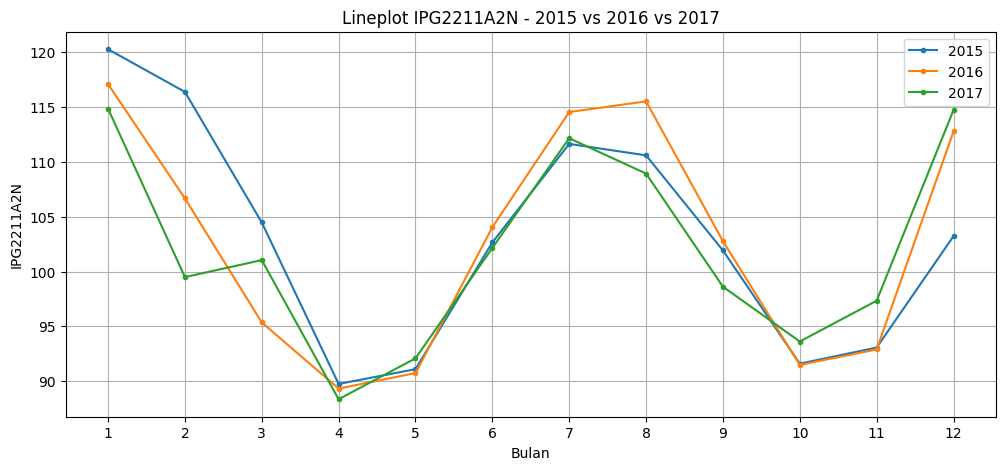

In [7]:
# Lineplot
plt.figure(figsize=(12, 5))

plt.plot(df_2015['Bulan'], df_2015['IPG_2015'], marker='o', markersize=3, label='2015')
plt.plot(df_2016['Bulan'], df_2016['IPG_2016'], marker='o', markersize=3, label='2016')
plt.plot(df_2017['Bulan'], df_2017['IPG_2017'], marker='o', markersize=3, label='2017')

plt.title('Lineplot IPG2211A2N - 2015 vs 2016 vs 2017')
plt.xlabel('Bulan')
plt.ylabel('IPG2211A2N')
plt.grid()
plt.legend()

plt.show()

> **JENIS PLOT = LINE PLOT**

> **INSIGHT**

* Diperoleh insight bahwa pada bulan 5 sampai dengan bulan 7 ditiap tahunnya (2015, 2016, dan 2017), nilai IPG221A2N Cenderung mengalami kenaikan yang signifikan

In [8]:
# Rata-Rata tiap tahun
rata2_2015 = df_2015['IPG_2015'].mean()
rata2_2016 = df_2016['IPG_2016'].mean()
rata2_2017 = df_2017['IPG_2017'].mean()

# **LEVEL 1 - DB**

membuat boxplot untuk membandingkan distribusi antara nilai glukosa penderita diabetes dan bukan

In [9]:
# Panggil Dataset
df_DB = pd.read_csv("/kaggle/input/level1-db/DB.csv")

In [10]:
df_DB

,Glucose,BloodPressure,Insulin,Outcome
0,148,72,0,diabetes
1,85,66,0,no diabetes
2,183,64,0,diabetes
3,89,66,94,no diabetes
4,137,40,168,diabetes
...,...,...,...,...
763,101,76,180,no diabetes
764,122,70,0,no diabetes
765,121,72,112,no diabetes
766,126,60,0,diabetes


In [11]:
positif_diabetes = df_DB[df_DB['Outcome'] == 'diabetes']
negatif_diabetes = df_DB[df_DB['Outcome'] == 'no diabetes']

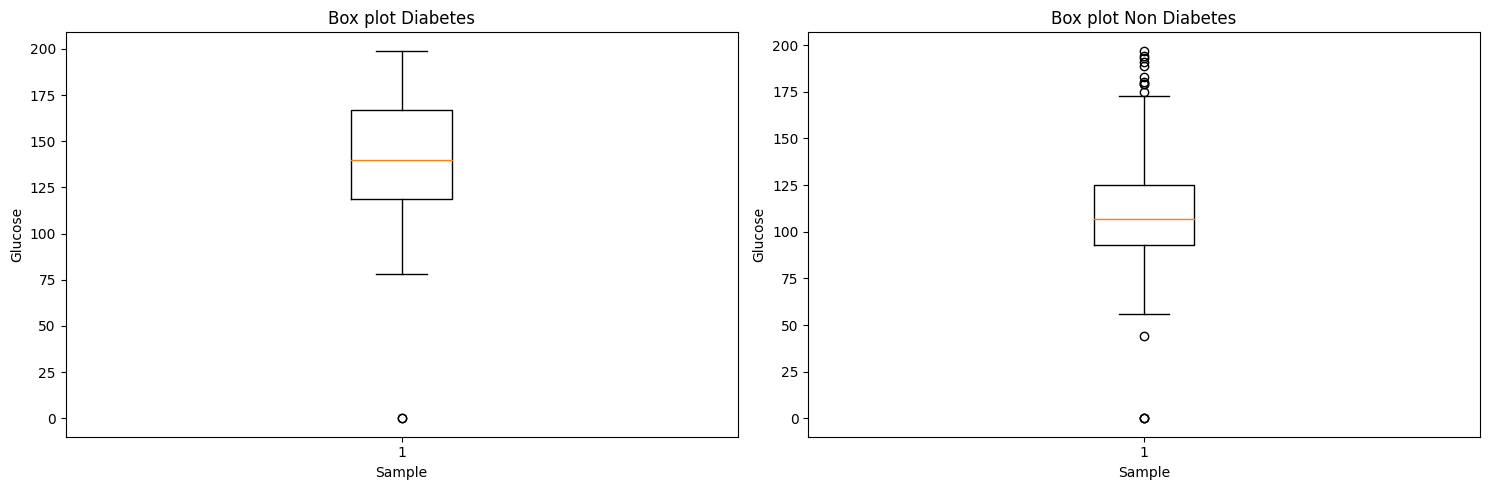

In [12]:
# Visual Data - Glukosa (Zoom Out)

# Ukuran canvas
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot
axs[0].boxplot(positif_diabetes['Glucose'])
axs[0].set_title('Box plot Diabetes')
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Glucose')
plt.grid()

# Boxplot
axs[1].boxplot(negatif_diabetes['Glucose'])
axs[1].set_title('Box plot Non Diabetes')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Glucose')

# Atur Ukuran
plt.grid()
plt.tight_layout()
plt.show()

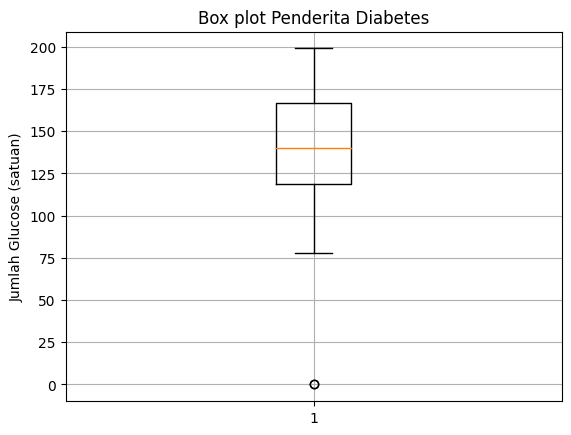

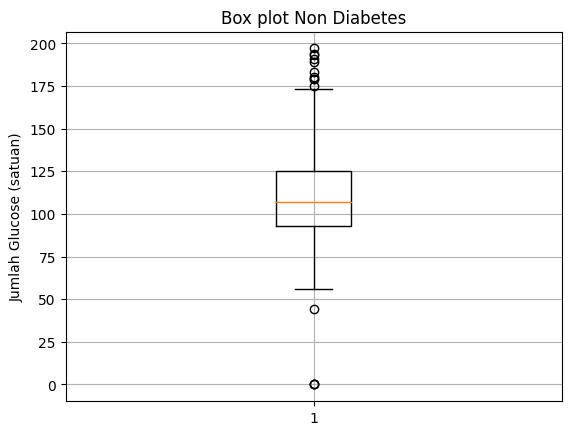

In [13]:
# Boxplot

plt.boxplot(positif_diabetes['Glucose'])
plt.ylabel('Jumlah Glucose (satuan)')
plt.title('Box plot Penderita Diabetes')
plt.grid()
plt.show()

plt.boxplot(negatif_diabetes['Glucose'])
plt.ylabel('Jumlah Glucose (satuan)')
plt.title('Box plot Non Diabetes')
plt.grid()
plt.show()

> **JENIS PLOT = BOX PLOT**

> **INSIGHT**

* Diperoleh insight bahwa bahwa terdapat kejanggalan atau keunikan (outlier) dimana beberapa orang yang tidak mengalami diabetes memiliki kadar gula (glucose) yang sangat tinggi disekitar angka 174 - 190 an padahal bukan penderita diabetes glukosa


# **LEVEL 1 - MS**

Membuat histogram untuk bisa mengamati distribusi harga brand

In [14]:
# Panggil Dataset
df_MS = pd.read_csv("/kaggle/input/level1-ms/MS.csv")

In [15]:
df_MS

,Brand,Price,UnitsSold
0,Green Inc,1196.95,85
1,Thomas-Thompson,1010.34,64
2,Sanchez-Williams,400.80,95
3,Greer and Sons,338.60,79
4,Brown and Sons,839.79,41
...,...,...,...
995,Brooks Ltd,1386.69,76
996,"Lang, Brown and Stone",1159.26,59
997,"Atkinson, Moore and Nelson",544.31,59
998,"Kim, Maxwell and Moore",331.98,84


In [16]:
# Cek Kategori / Tidak (Bukan..)
hitung_jumlah = df_MS['Brand'].value_counts()
hitung_jumlah

Brand
Martinez Ltd                   3
Sanchez PLC                    3
Ramos and Sons                 2
Williams Group                 2
Miller and Sons                2
                              ..
Jackson, Collier and Barber    1
Perez and Sons                 1
Ayers and Sons                 1
Holland PLC                    1
Kim, Maxwell and Moore         1
Name: count, Length: 980, dtype: int64

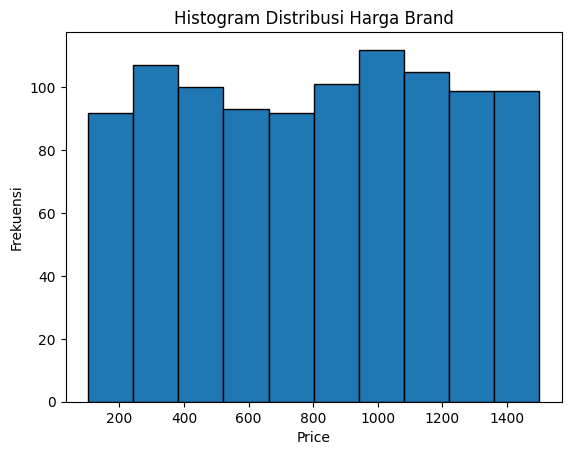

In [17]:
# Histogram
plt.hist(df_MS['Price'], edgecolor="black")
plt.xlabel('Price')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Harga Brand')
plt.show()

> **JENIS PLOT = HISTOGRAM**

> **INSIGHT**

* Diperoleh insight bahwa distribusi harga cenderung miring ke kiri (negative skewed) dengan jumlah frekuensi terbanyak berada pada rentang harga sekitar 1000



In [18]:
# Cek Skew (Left Skew)
#plt.boxplot(df_MS['Price'])
#plt.ylabel('Count')
#plt.title('Box plot Price MS')
#plt.grid()
#plt.show()

# **LEVEL 2 - A. Financial_Risk**

In [19]:
# Panggil Dataset
df_2A = pd.read_csv("/kaggle/input/level2-a/financial_risk_assessment.csv")

In [20]:
df_2A

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


**Tentang Dataset**

Kumpulan Data yang memberikan informasi rinci tentang profil keuangan individu

Fitur-fitur pada kolom : 
* **Age :** Usia individu, merupakan variabel kontinu yang mempengaruhi stabilitas keuangan.
* **Gender :** Jenis kelamin individu, dikategorikan menjadi Pria, Wanita, dan Non-biner.
* **Education Level :** Jenjang pendidikan tertinggi yang diraih, mulai dari SMA hingga PhD.
* **Marital Status :** Status perkawinan saat ini, dikategorikan sebagai Lajang, Menikah, Cerai, atau Janda.
* **Income :** Pendapatan tahunan dalam USD, mewakili kapasitas penghasilan individu.
* **Credit Score :** Nilai numerik yang menunjukkan kelayakan kredit, berkisar antara 600 hingga 800.
* **Loan Amount :** Jumlah pinjaman yang diminta oleh individu, mewakili kebutuhan finansial
* **Loan Purpose :** Tujuan pinjaman, dikategorikan menjadi Rumah, Mobil, Pribadi, atau Bisnis.
* **Employment Status :** Situasi ketenagakerjaan individu, termasuk Bekerja, Menganggur, atau Wiraswasta.
* **Years at Current Job :** Durasi kerja pada pekerjaan saat ini, mencerminkan stabilitas pekerjaan.
* **...**

**Total Kolom = 20 | Total Baris = 15000**

# -> **2A - Insight Pertama**
Menggunakan Barchart untuk mengetahui status pekerjaan terbanyak berdasarkan gender

In [21]:
# Filter data - Employed
df_employed_male = df_2A[(df_2A['Gender'] == 'Male') & (df_2A['Employment Status'] == 'Employed')].shape[0]
df_employed_female = df_2A[(df_2A['Gender'] == 'Female') & (df_2A['Employment Status'] == 'Employed')].shape[0]
df_employed_nonbinary = df_2A[(df_2A['Gender'] == 'Non-binary') & (df_2A['Employment Status'] == 'Employed')].shape[0]

# Filter data - Unemployed
df_unemployed_male = df_2A[(df_2A['Gender'] == 'Male') & (df_2A['Employment Status'] == 'Unemployed')].shape[0]
df_unemployed_female = df_2A[(df_2A['Gender'] == 'Female') & (df_2A['Employment Status'] == 'Unemployed')].shape[0]
df_unemployed_nonbinary = df_2A[(df_2A['Gender'] == 'Non-binary') & (df_2A['Employment Status'] == 'Unemployed')].shape[0]

# Filter data - Self-employed
df_selfemployed_male = df_2A[(df_2A['Gender'] == 'Male') & (df_2A['Employment Status'] == 'Self-employed')].shape[0]
df_selfemployed_female = df_2A[(df_2A['Gender'] == 'Female') & (df_2A['Employment Status'] == 'Self-employed')].shape[0]
df_selfemployed_nonbinary = df_2A[(df_2A['Gender'] == 'Non-binary') & (df_2A['Employment Status'] == 'Self-employed')].shape[0]

In [22]:
df_employed_female

1709

In [23]:
df_selfemployed_nonbinary

1698

In [24]:
# Hitung
jumlah_employed = df_2A[(df_2A['Employment Status'] == 'Employed')].shape[0]
jumlah_unemployed = df_2A[(df_2A['Employment Status'] == 'Unemployed')].shape[0]
jumlah_selfemployed = df_2A[(df_2A['Employment Status'] == 'Self-employed')].shape[0]

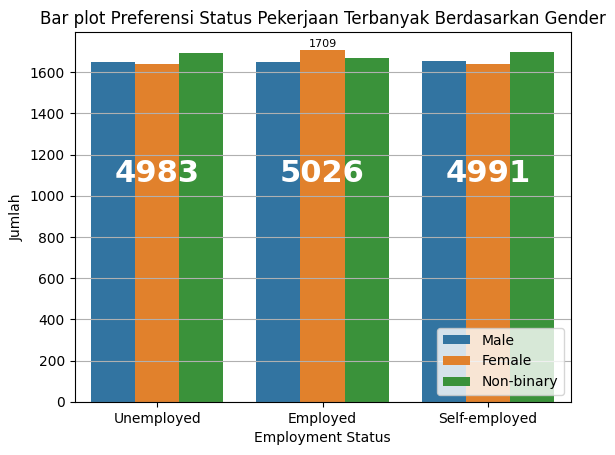

In [25]:
# Membuat bar plot
sns.countplot(x='Employment Status', hue='Gender', data=df_2A)
plt.title('Bar plot Preferensi Status Pekerjaan Terbanyak Berdasarkan Gender')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.ylabel('Jumlah')

# Text
plt.annotate(jumlah_unemployed, (0, 1000), textcoords="offset points", xytext=(0,10), color='white', ha='center', fontweight='bold', fontsize=22)
plt.annotate(jumlah_employed, (1, 1000), textcoords="offset points", xytext=(0,10), color='white', ha='center', fontweight='bold', fontsize=22)
plt.annotate(jumlah_selfemployed, (2, 1000), textcoords="offset points", xytext=(0,10), color='white', ha='center', fontweight='bold', fontsize=22)
plt.annotate(df_employed_female, (1, 1600), textcoords="offset points", xytext=(0,18), color='black', ha='center', fontsize=8)

plt.show()


> **JENIS PLOT = BAR PLOT**

> **INSIGHT**

* Diperoleh insight bahwa bahwa status pekerjaan "Employed" merupakan status yang paling banyak dimiliki yaitu sebesar 5026. Sekaligus Status "Employed" terbanyak dimiliki oleh wanita dibandingkan dengan gender lain dengan jumlah sebesar 1709 wanita



# -> **2A - Insight Kedua**

Mempersempit pencarian dengan ketentuan kolom (gender == 'female') && (employment status == 'Employed'), lalu membuat sebuah histogram untuk mengetahui distribusi terbanyak wanita berstatus 'Employed' berada pada umur berapa

In [26]:
df_employed_female2 = df_2A[(df_2A['Gender'] == 'Female') & (df_2A['Employment Status'] == 'Employed')]

In [27]:
df_employed_female2

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
41,35,Female,High School,Single,101496.0,715.0,16971.0,Home,Employed,17,Fair,0.533787,271400.0,1.0,Michaelburgh,TX,Anguilla,NaN,0,Medium
42,35,Female,PhD,Divorced,42787.0,NaN,14949.0,Home,Employed,19,Excellent,0.224991,227655.0,4.0,West Donna,WY,Svalbard & Jan Mayen Islands,2.0,2,Low
50,68,Female,PhD,Single,59300.0,NaN,34783.0,Auto,Employed,3,Excellent,0.235761,270400.0,NaN,West Patrick,WY,Bouvet Island (Bouvetoya),0.0,2,Low
68,55,Female,Bachelor's,Divorced,63915.0,NaN,10084.0,Personal,Employed,7,Good,0.362397,NaN,2.0,Wilsonton,MH,San Marino,1.0,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14950,39,Female,Master's,Divorced,29849.0,629.0,26477.0,Auto,Employed,0,Poor,0.350012,NaN,2.0,Smithburgh,WI,Montenegro,0.0,2,High
14957,29,Female,Bachelor's,Married,23659.0,NaN,38745.0,Personal,Employed,10,Excellent,0.482572,193254.0,4.0,Farleyburgh,LA,Andorra,2.0,1,Low
14966,66,Female,High School,Widowed,55797.0,NaN,23132.0,Personal,Employed,5,Fair,0.316312,257806.0,2.0,New Ashleyside,RI,Uzbekistan,2.0,0,Low
14980,28,Female,PhD,Widowed,105965.0,625.0,19476.0,Home,Employed,13,Excellent,0.238046,33487.0,1.0,Christopherfort,MP,Austria,0.0,1,Low


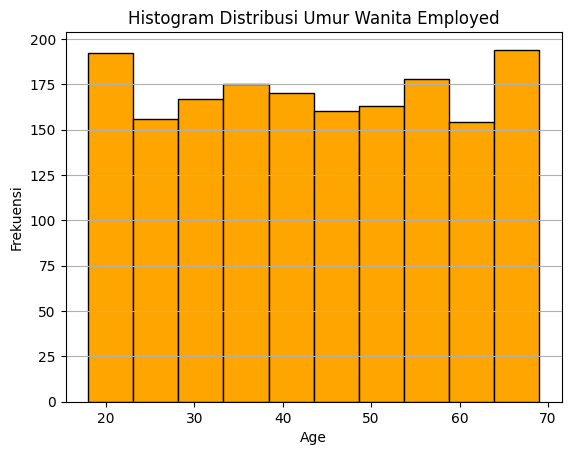

In [28]:
# Histogram
plt.hist(df_employed_female2['Age'], color = 'orange', edgecolor="black")
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Umur Wanita Employed')
plt.grid(axis='y')
plt.show()

> **JENIS PLOT = HISTOGRAM**

> **INSIGHT**

* Diperoleh insight bahwa kebanyakan wanita (female) yang bekerja (employed) itu berada pada umur tua di kisaran 60-70



In [29]:
# Cek Skew (Right Skew)
#plt.boxplot(df_employed_female2['Age'])
#plt.ylabel('Count')
#plt.title('Box plot Umur Wanita Employed')
#plt.grid()
#plt.show()

# -> **2A - Insight Ketiga**


Mempersempit pencarian dengan ketentuan kolom (gender == 'female') && (employment status == 'Employed') serta umur diantara 60-70. Lalu membuat sebuah Pie Chart untuk mengetahui banyaknya presentase wanita dengan ketentuan yang sudah ditetapkan.

In [30]:
df_employed_female3 = df_2A[(df_2A['Gender'] == 'Female') & (df_2A['Employment Status'] == 'Employed') & (df_2A['Age'] >= 60) & (df_2A['Age'] <= 70)]

In [31]:
df_employed_female3

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
50,68,Female,PhD,Single,59300.0,NaN,34783.0,Auto,Employed,3,Excellent,0.235761,270400.0,NaN,West Patrick,WY,Bouvet Island (Bouvetoya),0.0,2,Low
144,66,Female,Master's,Divorced,47785.0,NaN,14137.0,Auto,Employed,16,Fair,0.369847,147601.0,1.0,South Maria,NM,Czech Republic,4.0,0,Medium
147,63,Female,High School,Single,40113.0,722.0,5044.0,Personal,Employed,1,Excellent,0.496244,159493.0,3.0,New Martinberg,OR,Cyprus,NaN,2,Low
195,63,Female,Bachelor's,Divorced,101844.0,688.0,9667.0,Home,Employed,1,Excellent,0.251662,61882.0,NaN,West Robin,IL,Somalia,4.0,2,Low
205,60,Female,PhD,Married,80883.0,699.0,46731.0,Auto,Employed,12,Excellent,0.561233,200074.0,3.0,East Sherrifurt,GU,British Indian Ocean Territory (Chagos Archipe...,NaN,2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14731,64,Female,High School,Divorced,37344.0,683.0,14890.0,Home,Employed,2,Excellent,0.234734,299810.0,4.0,Michaelhaven,IA,Jersey,3.0,1,Medium
14890,62,Female,PhD,Married,112246.0,NaN,18762.0,Home,Employed,17,Excellent,0.386195,117960.0,2.0,Ryanberg,NJ,Namibia,0.0,1,Low
14891,63,Female,High School,Widowed,55785.0,694.0,NaN,Business,Employed,4,Poor,0.444807,NaN,NaN,South William,OR,Ukraine,0.0,1,Medium
14895,66,Female,Bachelor's,Single,73906.0,766.0,33647.0,Auto,Employed,6,Excellent,0.461541,23522.0,1.0,West Lisa,ID,Martinique,1.0,2,Medium


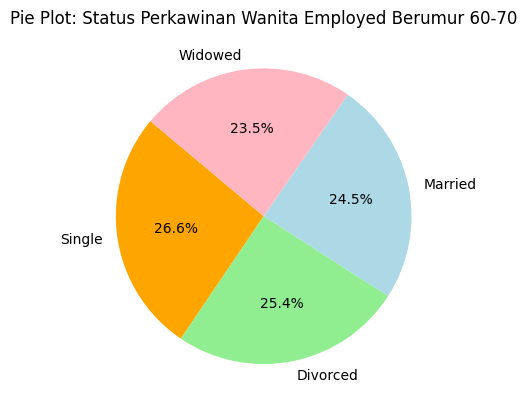

In [32]:
y = df_employed_female3['Marital Status']
colors = ['orange', 'lightgreen', 'lightblue', 'lightpink']

visitor_type_counts = df_employed_female3['Marital Status'].value_counts()
plt.pie(visitor_type_counts, labels=df_employed_female3['Marital Status'].unique(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pie Plot: Status Perkawinan Wanita Employed Berumur 60-70')
plt.show()

> **JENIS PLOT = PIE CHART**

> **INSIGHT**

* Diperoleh insight bahwa kebanyakan wanita yang masih bekerja di umur 60-70 merupakan wanita dengan status Single dengan presentase sebanyak 26.6% dari total 319 wanita berumur 60-70

# **LEVEL 2 - B. Delhivery Logistics Dataset**

In [33]:
# Panggil Dataset
df_2B = pd.read_csv("/kaggle/input/level2-b/delhivery.csv")

In [34]:
df_2B

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


**Tentang Dataset**

Kumpulan Data Dinamika dan Analisis Logistik dan Rantai Pasokan

Fitur-fitur pada kolom : 
* **data :** Memberitahukan apakah data tersebut merupakan data pengujian atau data pelatihan.
* **trip_creation_time :** Stempel waktu pembuatan perjalanan.
* **route_schedule_uuid :** Id unik untuk jadwal rute tertentu.
* **route_type :** Jenis transportasi FTL – Muatan Truk Penuh: Pengiriman FTL lebih cepat sampai di tujuan, karena truk sedang melakukan no.
* **trip_uuid :** ID unik yang diberikan untuk perjalanan tertentu (Perjalanan mungkin mencakup pusat sumber dan tujuan yang berbeda).
* **source_center :** ID Sumber asal perjalanan.
* **source_name :** Sumber Nama asal perjalanan.
* **destination_center :** ID Tujuan.
* **destination_name :** Nama Tujuan.
* **od_start_time :** Waktu mulai perjalanan.
* **...**

**Total Kolom = 24 | Total Baris = 144867**

# -> **2B - Insight Pertama**

Menggunakan Scatterplot untuk mengetahui kuat hubungan antara jarak sebenarnya dan waktu sebenarnya yang ditempuh

In [35]:
# Cek Tipe Data
df_2B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

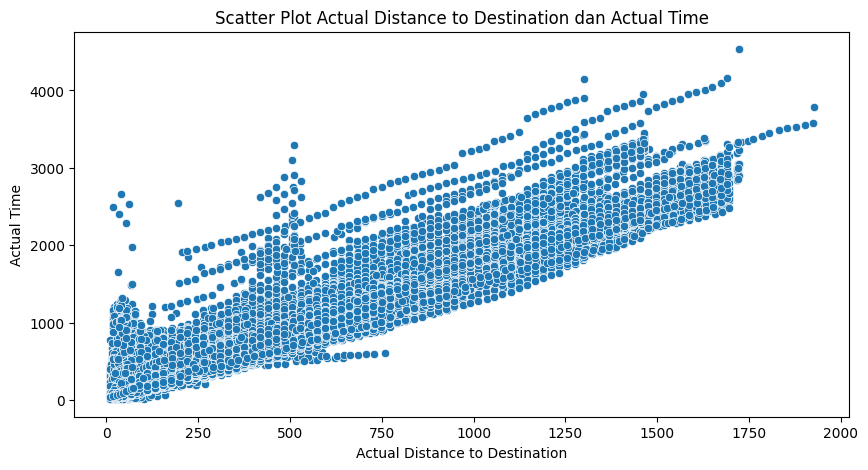

In [36]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_2B, x='actual_distance_to_destination', y='actual_time')
plt.title('Scatter Plot Actual Distance to Destination dan Actual Time')
plt.xlabel('Actual Distance to Destination')
plt.ylabel('Actual Time')
plt.show()

> **JENIS PLOT = SCATTER PLOT**

> **INSIGHT**

* Diperoleh insight bahwa terdapat hubungan positif yang kuat (high degree of positive corellation) antara jarak tujuan sebenarnya dengan waktu sebenarnya, dimana artinya jika semakin jauh jaraknya ke tujuan maka semakin jauh juga waktu yang ditempuh

# -> **2B - Insight Kedua**


Membuat sebuah histogram untuk menjawab pertanyaan sebelumnya, yaitu distribusi jarak pengiriman aktual

In [37]:
#sorted_actualdistance = df_2B.sort_values("actual_distance_to_destination", ascending=False)

In [38]:
#sorted_actualdistance

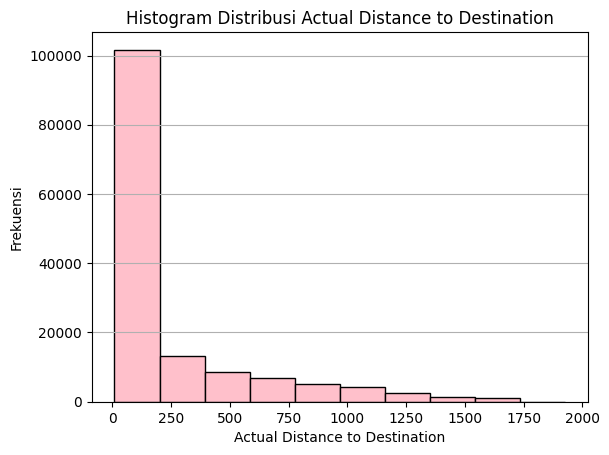

In [39]:
# Histogram
plt.hist(df_2B['actual_distance_to_destination'], color = 'pink', bins=10, edgecolor="black")
plt.xlabel('Actual Distance to Destination')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Actual Distance to Destination')
plt.grid(axis='y')
plt.show()

> **JENIS PLOT = HISTOGRAM**

> **INSIGHT**

* Diperoleh insight bahwa distribusi data cenderung miring ke kanan (positively skewed), yang berarti menunjukkan sejumlah besar perjalanan menempuh jarak yang relatif pendek. Sehingga hal ini menunjukkan bahwa sebagian besar perjalanan dilakukan dekat dengan titik awal.

# -> **2B - Insight Ketiga**


Membuat boxplot untuk membandingkan dan memperoleh data statistik jarak tujuan sebenarnya berdasarkan tipe rute

In [40]:
# Cek Kategorikal
df_2B['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

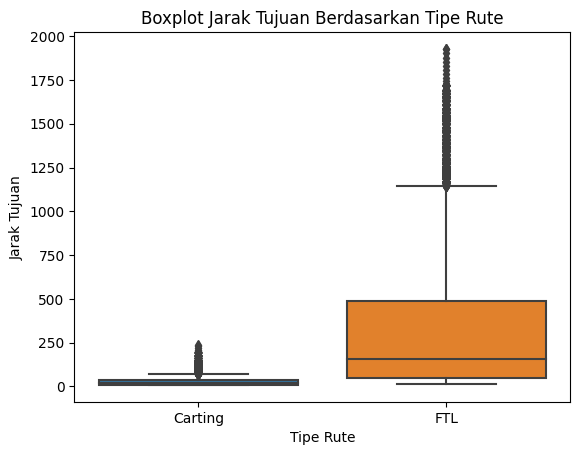

In [41]:
# Membuat box plot
sns.boxplot(x='route_type', y='actual_distance_to_destination', data=df_2B)

# Menambahkan judul dan label sumbu
plt.title('Boxplot Jarak Tujuan Berdasarkan Tipe Rute')
plt.xlabel('Tipe Rute')
plt.ylabel('Jarak Tujuan') 

# Menampilkan plot
plt.show()

> **JENIS PLOT = BOX PLOT**

> **INSIGHT**

* Diperoleh insight bahwa bahwa FTL memiliki jarak tempuh rata-rata yang jauh lebih tinggi dibandingkan dengan Carting. Dengan sedikit analisis juga

* **Carting =** Pengiriman dengan skala yang kecil (gerobak, kendaraan kecil)
* **FTL =** Full Truck Load (Angkutan Penuh) yang dimana dikhususkan untuk perjalanan jauh

Sehingga hal tersebut logis juga kenapa FTL rata-rata jarak perjalanannya jauh lebih tinggi

# **LEVEL 2 - C. Appliances Energy Prediction**

In [42]:
# Panggil Dataset
df_2C = pd.read_csv("/kaggle/input/level2-c/KAG_energydata_complete.csv")

In [43]:
df_2C

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


**Tentang Dataset**

Data eksperimen yang digunakan untuk membuat model regresi penggunaan energi peralatan di gedung berenergi rendah.

Fitur-fitur pada kolom : 
* **data :** waktu tahun-bulan-hari jam : menit : detik.
* **Appliances :** penggunaan energi dalam Wh.
* **lights :** penggunaan energi lampu di rumah di Wh.
* **T1 :** Suhu di area dapur, dalam Celcius.
* **RH_1 :** Kelembapan di area dapur, dalam %
* **T2 :** Suhu di ruang tamu, dalam Celcius
* **RH_2 :** Kelembapan di ruang tamu, dalam %
* **T3 :** Suhu di area ruang cuci
* **RH_3 :** Kelembapan di area ruang cuci, dalam %
* **T4 :** Suhu di ruang kantor, dalam Celsius
* **RH_4 :** Kelembapan di ruang kantor, dalam %
* **T5 :** Suhu di kamar mandi, dalam Celsius
* **RH_5 :** Kelembapan di kamar mandi, dalam %
* **T6 :** Suhu di luar gedung (sisi utara), dalam Celcius
* **RH_6 :** Kelembapan di luar gedung (sisi utara), dalam %
* **T7 :** Suhu di ruang setrika, dalam Celcius
* **RH_7 :** Kelembapan di ruang setrika, dalam %
* **T8 :** Suhu di kamar remaja 2, dalam Celcius
* **RH_8 :** Kelembapan di kamar remaja 2, dalam %
* **T9 :** Suhu di kamar orang tua, dalam Celsius
* **RH_9 :** Kelembapan di kamar orang tua, dalam %
* **T_out :** Suhu di luar (dari stasiun cuaca Chievres), dalam Celsius
* **Press_mm_hg :** (dari stasiun cuaca Chievres), dalam mm Hg
* **RH_out :** Kelembapan di luar (dari stasiun cuaca Chievres), dalam %
* **Windspeed :** (dari stasiun cuaca Chievres), dalam m/s
* **Visibility :** (dari stasiun cuaca Chievres), dalam km
* **Tdewpoint :** (dari stasiun cuaca Chievres), Â°C
* **rv1 :** Variabel acak 1, nondimensi
* **rv2 :** Variabel acak 2, nondimensi

**Total Kolom = 29 | Total Baris = 19735**

In [44]:
# Cek Tipe Data
df_2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# -> **2C - Insight Pertama**


Membuat lineplot untuk membandingkan fluktuasi mingguan pada bulan tertentu yaitu pada bulan 2 yaitu Februari 2016

In [45]:
# Ubah tipe data
df_2C['date'] = pd.to_datetime(df_2C['date'])

# Ambil Kolom Date dan Appliances
data_appliances = df_2C[['date','Appliances']]

# Jadikan Date menjadi Index (Resampling Purpose) 
data_appliances = data_appliances.set_index('date')

# Resampling
data_appliances = data_appliances.resample("60min").mean()
print(f"Length after resampling: {len(data_appliances)}")

data_appliances.head(10)

Length after resampling: 3290


,Appliances
date,
2016-01-11 17:00:00,55.000000
2016-01-11 18:00:00,176.666667
2016-01-11 19:00:00,173.333333
2016-01-11 20:00:00,125.000000
2016-01-11 21:00:00,103.333333
2016-01-11 22:00:00,266.666667
2016-01-11 23:00:00,56.666667
2016-01-12 00:00:00,141.666667
2016-01-12 01:00:00,168.333333


In [46]:
minggu1 = data_appliances[(data_appliances.index >= '2016-02-01 00:00:00') & (data_appliances.index <= '2016-02-08 00:00:00')]
minggu2 = data_appliances[(data_appliances.index >= '2016-02-08 00:00:00') & (data_appliances.index <= '2016-02-15 00:00:00')]
minggu3 = data_appliances[(data_appliances.index >= '2016-02-15 00:00:00') & (data_appliances.index <= '2016-02-22 00:00:00')]
minggu4 = data_appliances[(data_appliances.index >= '2016-02-22 00:00:00') & (data_appliances.index <= '2016-02-29 00:00:00')]

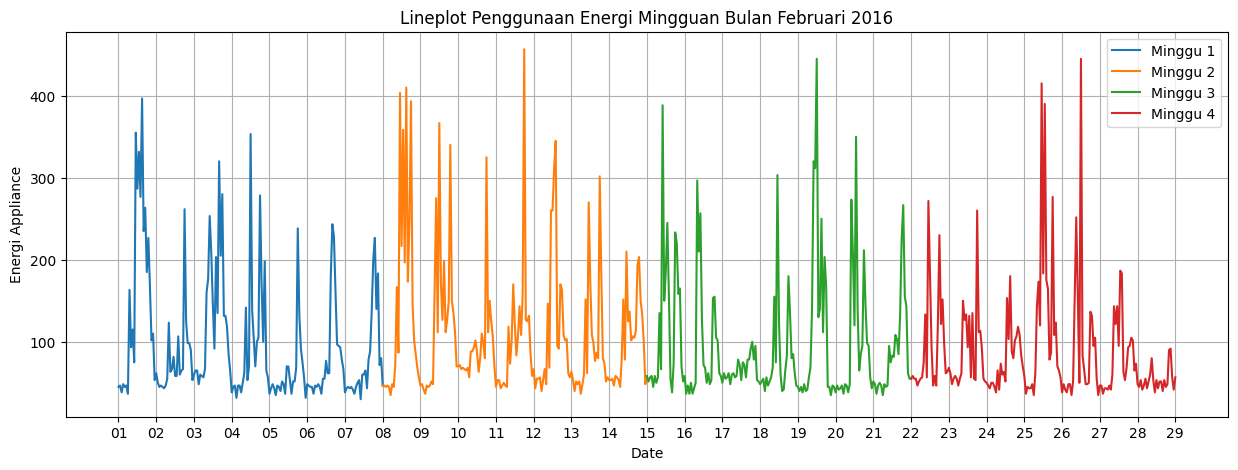

In [47]:
# Lineplot
plt.figure(figsize=(15, 5))

plt.plot(minggu1.index, minggu1['Appliances'], label='Minggu 1')
plt.plot(minggu2.index, minggu2['Appliances'], label='Minggu 2')
plt.plot(minggu3.index, minggu3['Appliances'], label='Minggu 3')
plt.plot(minggu4.index, minggu4['Appliances'], label='Minggu 4')

# Identifikasi tanggal Senin di bulan Februari 2016
tanggal_senin = pd.date_range('2016-02-01', periods=29, freq='D')

# Atur label x-axis
plt.xticks(tanggal_senin, tanggal_senin.strftime('%d'))

plt.title('Lineplot Penggunaan Energi Mingguan Bulan Februari 2016')
plt.xlabel('Date')
plt.ylabel('Energi Appliance')
plt.grid()
plt.legend()

plt.show()

> **JENIS PLOT = LINE PLOT**

> **INSIGHT**

* Diperoleh insight bahwa pada bulan Februari 2016 setiap harinya terjadi lonjakan dalam setiap minggunya. Lonjakan ekstrim paling sering terjadi pada Minggu-2 (tgl 8-15) dibanding minggu lainnya.

# -> **2C - Insight Kedua**


Membuat boxplot untuk mengetahui perbandingan suhu di berbagai ruangan (dalam)

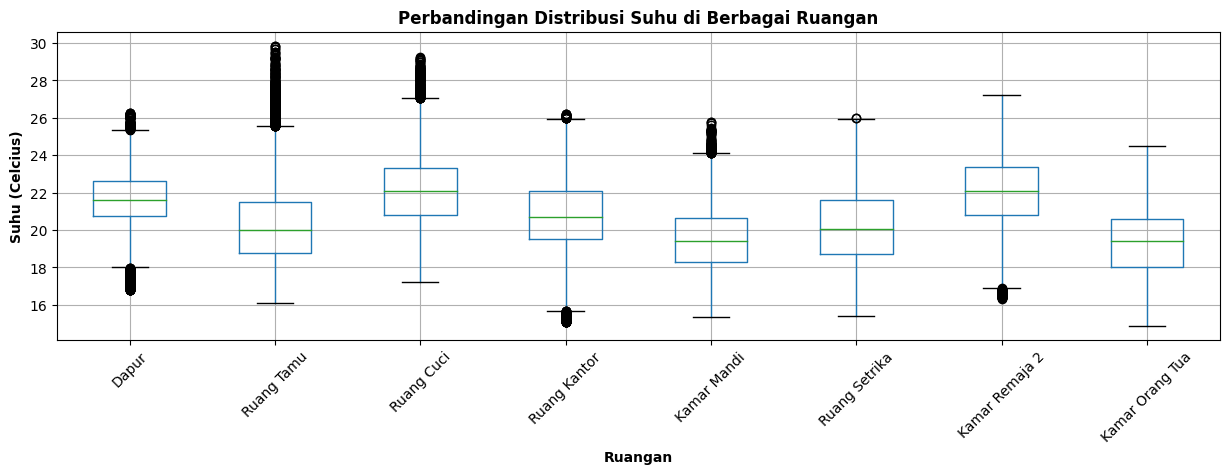

In [48]:
# Memilih kolom suhu (Dalam Rumah)
kolom_suhu = ['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']

# Membuat box plot
plt.figure(figsize=(15, 4))
df_2C[kolom_suhu].boxplot()
plt.title('Perbandingan Distribusi Suhu di Berbagai Ruangan', fontweight='bold')
plt.ylabel('Suhu (Celcius)', fontweight='bold')
plt.xlabel('Ruangan', fontweight='bold')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['Dapur', 'Ruang Tamu', 'Ruang Cuci', 'Ruang Kantor', 'Kamar Mandi', 'Ruang Setrika', 'Kamar Remaja 2', 'Kamar Orang Tua'], rotation=45)
plt.show()


> **JENIS PLOT = BOX PLOT**

> **INSIGHT**

* Diperoleh insight bahwa kamar orang tua (T9) merupakan ruangan yang memiliki suhu paling rendah dibandingkan ruangan lainnya serta satu-satunya data yang tidak memiliki outlier yang terlihat dibanding ruangan lain dimana.

Saya juga disini juga mencari faktor kenapa kamar orang tua memiliki suhu terendah dan konsisten. Asumsi saya adalah **karena Kamar orang tua biasanya hanya digunakan untuk istirahat, sehingga aktivitas di ruangan ini cenderung lebih stabil dibandingkan ruangan lain yang mungkin memiliki aktivitas yang lebih bervariasi.**

# -> **2C - Insight Ketiga**


Membuat scatter plot antara suhu di kamar orang tua dengan suhu di luar untuk mengetahui hubungan antar variabel tersebut.

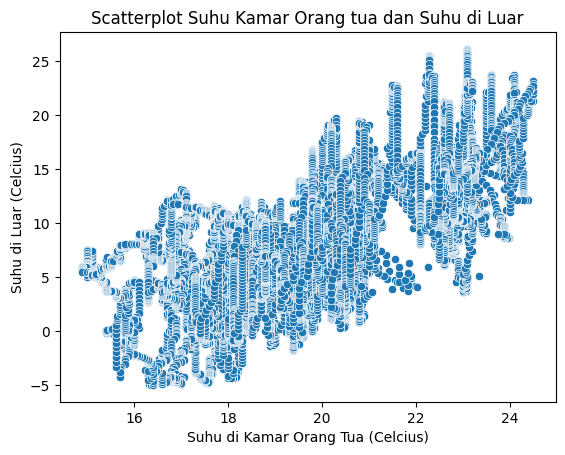

In [49]:
# Contoh untuk membuat scatter plot antara Appliances dan T1
sns.scatterplot(x='T9', y='T_out', data=df_2C)
plt.xlabel('Suhu di Kamar Orang Tua (Celcius)')
plt.ylabel('Suhu di Luar (Celcius)')
plt.title('Scatterplot Suhu Kamar Orang tua dan Suhu di Luar')
plt.show()

> **JENIS PLOT = SCATTER PLOT**

> **INSIGHT**

* Diperoleh insight bahwa terdapat hubungan yang kuat (high degree of positive corelation) antara suhu kamar orang tua dengan suhu di luar ruangan. Yang berarti ketika suhu di luar naik, suhu di dalam kamar orang tua juga akan naik.

# **LEVEL 3 - A. Taxi (JOIN)**

In [50]:
# Panggil Dataset
df_3A_1 = pd.read_csv("/kaggle/input/level3-a/taxi_owners.csv")
df_3A_1 = df_3A_1.sort_values("vid") # Sorting

df_3A_2 = pd.read_csv("/kaggle/input/level3-a/taxi_vehicles.csv")
df_3A_2 = df_3A_2.sort_values("vid") # Sorting

In [51]:
df_3A_1

,rid,vid,owner,address,zip
3333,T1,1,YC1 LLC,3351 W. ADDISON ST.,60618
2096,T2,2,YC1 LLC,3351 W. ADDISON ST.,60618
2350,T3,3,YC1 LLC,3351 W. ADDISON ST.,60618
1912,T4,4,YC1 LLC,3351 W. ADDISON ST.,60618
461,T5,5,YC1 LLC,3351 W. ADDISON ST.,60618
...,...,...,...,...,...
2933,T6961,6961,FAST CAB AND LIMO SERVICES INC,9696 W. FOSTER AVE.,60656
1484,T6962,6962,CHITOWNCABBIE INC.,2532 W. WARREN BLVD.,60612
2952,T6967,6967,AANADIL INC,3351 W. ADDISON ST.,60618
2437,T6968,6968,B & B TAXI CAB INC,3351 W. ADDISON ST.,60618


In [52]:
df_3A_2

,vid,make,model,year,fuel_type,owner
831,1,TOYOTA,CAMRY,2014,HYBRID,YC1 LLC
2788,2,TOYOTA,CAMRY,2019,HYBRID,YC1 LLC
108,3,TOYOTA,CAMRY,2019,HYBRID,YC1 LLC
3110,4,TOYOTA,CAMRY,2019,HYBRID,YC1 LLC
2894,5,TOYOTA,CAMRY,2019,HYBRID,YC1 LLC
...,...,...,...,...,...,...
1256,6961,DODGE,GRAND CARAVAN,2016,FLEX FUEL,FAST CAB AND LIMO SERVICES INC
2124,6962,TOYOTA,SIENNA,2019,GASOLINE,CHITOWNCABBIE INC.
1422,6967,DODGE,CARAVAN,2017,FLEX FUEL,AANADIL INC
3465,6968,VPG,MV-1,2014,GASOLINE,B & B TAXI CAB INC


In [53]:
# Left Join
df_3A = pd.merge(df_3A_1, df_3A_2, how='left')

df_3A

,rid,vid,owner,address,zip,make,model,year,fuel_type
0,T1,1,YC1 LLC,3351 W. ADDISON ST.,60618,TOYOTA,CAMRY,2014,HYBRID
1,T2,2,YC1 LLC,3351 W. ADDISON ST.,60618,TOYOTA,CAMRY,2019,HYBRID
2,T3,3,YC1 LLC,3351 W. ADDISON ST.,60618,TOYOTA,CAMRY,2019,HYBRID
3,T4,4,YC1 LLC,3351 W. ADDISON ST.,60618,TOYOTA,CAMRY,2019,HYBRID
4,T5,5,YC1 LLC,3351 W. ADDISON ST.,60618,TOYOTA,CAMRY,2019,HYBRID
...,...,...,...,...,...,...,...,...,...
3514,T6961,6961,FAST CAB AND LIMO SERVICES INC,9696 W. FOSTER AVE.,60656,DODGE,GRAND CARAVAN,2016,FLEX FUEL
3515,T6962,6962,CHITOWNCABBIE INC.,2532 W. WARREN BLVD.,60612,TOYOTA,SIENNA,2019,GASOLINE
3516,T6967,6967,AANADIL INC,3351 W. ADDISON ST.,60618,DODGE,CARAVAN,2017,FLEX FUEL
3517,T6968,6968,B & B TAXI CAB INC,3351 W. ADDISON ST.,60618,VPG,MV-1,2014,GASOLINE


# -> **3A - Insight Pertama**


Membuat bar plot untuk mengetahui tipe bahan bakar terbanyak yang digunakan kendaraan.

In [54]:
# Cek Kategori / Tidak (Benar..)
hitung_jumlah = df_3A['fuel_type'].value_counts()
hitung_jumlah

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64

In [55]:
# Hitung
type1 = df_3A[(df_3A['fuel_type'] == 'HYBRID')].shape[0]
type2 = df_3A[(df_3A['fuel_type'] == 'GASOLINE')].shape[0]
type3 = df_3A[(df_3A['fuel_type'] == 'FLEX FUEL')].shape[0]
type4 = df_3A[(df_3A['fuel_type'] == 'COMPRESSED NATURAL GAS')].shape[0]

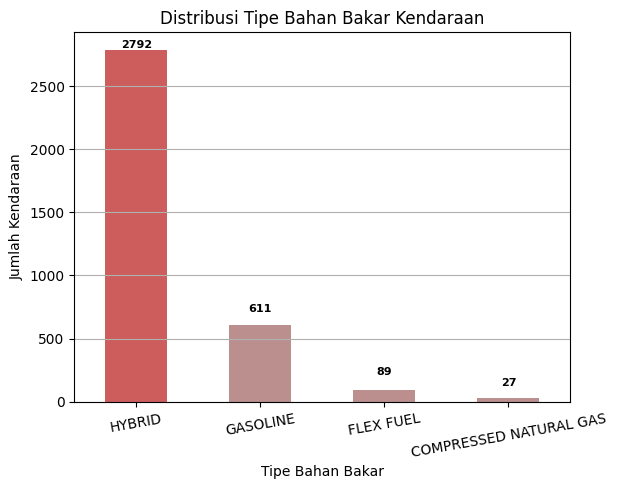

In [56]:
# Hitung Jumlah fuel
fuel_counts = df_3A['fuel_type'].value_counts()

# Kategori Tertinggi
kategori_tertinggi = fuel_counts.idxmax()

# Warna
colors = ['rosybrown'] * len(fuel_counts)
colors[fuel_counts.index.get_loc(kategori_tertinggi)] = 'indianred'

# Label Jumlah
plt.annotate(type1, (0, 2700), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize=8)
plt.annotate(type2, (1, 600), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize=8)
plt.annotate(type3, (2, 100), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize=8)
plt.annotate(type4, (3, 20), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize=8)

# Diagram batang
fuel_counts.plot(kind='bar', color=colors)
plt.title('Distribusi Tipe Bahan Bakar Kendaraan')
plt.xlabel('Tipe Bahan Bakar')
plt.ylabel('Jumlah Kendaraan')
plt.grid(axis='y')
plt.xticks(rotation=10)
plt.show()

> **JENIS PLOT = BAR PLOT**

> **INSIGHT**

* Diperoleh insight bahwa sebagian banyak kendaraan cenderung lebih banyak menggunakan bahan bakar campuran (HYBIRD) daripada hanya menggunakan satu jenis bahan bakar saja dengan jumlah sebesar 2792 kendaraan.

# -> **3A - Insight Kedua**

Membuat histogram untuk mengetahui distribusi tahun pembuatan taxi.

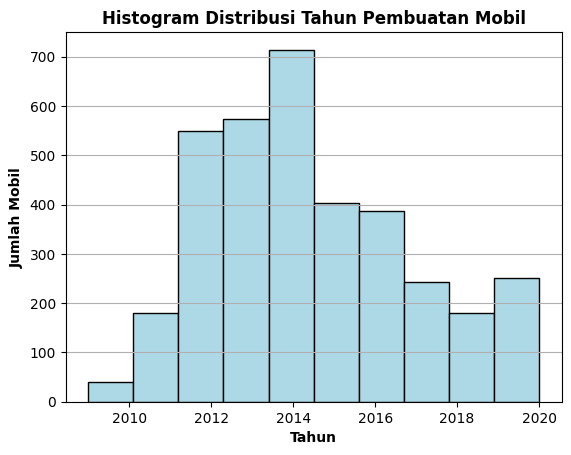

In [57]:
# Histogram
plt.hist(df_3A['year'], color = 'lightblue', edgecolor="black")
plt.xlabel('Tahun', fontweight='bold')
plt.ylabel('Jumlah Mobil', fontweight='bold')
plt.title('Histogram Distribusi Tahun Pembuatan Mobil', fontweight='bold')
plt.grid(axis='y')
plt.show()

> **JENIS PLOT = HISTOGRAM**

> **INSIGHT**

* Diperoleh insight bahwa jumlah produksi mobil tertinggi diproduksi pada tahun 2014.

# **LEVEL 3 - B. Movies (JOIN)**

In [58]:
# Panggil Dataset
actor_movies = pd.read_csv("/kaggle/input/level3-b/actors_movies.csv")
cast = pd.read_csv("/kaggle/input/level3-b/casts.csv")
crews = pd.read_csv("/kaggle/input/level3-b/crews.csv")
movie_to_genres = pd.read_csv("/kaggle/input/level3-b/movie_to_genres.csv")
movies = pd.read_csv("/kaggle/input/level3-b/movies.csv")
ratings = pd.read_csv("/kaggle/input/level3-b/ratings.csv")
sequels = pd.read_csv("/kaggle/input/level3-b/sequels.csv")

In [59]:
# Merge
#df_id = pd.merge(cast, crews, on=['id', 'department', 'job', 'name'])
#df_id = df_id.merge(movies, on='id')
#df_id = df_id.merge(ratings, on='id')
#df_id = df_id.merge(sequels, on=['id', 'title'])

In [60]:
# Join
df_id = cast.join(crews.set_index(['id', 'department', 'job', 'name']), on=['id', 'department', 'job', 'name'])
df_id = df_id.join(movies.set_index('id'), on='id')
df_id = df_id.join(ratings.set_index('id'), on='id')
df_id = df_id.join(sequels.set_index(['id', 'title']), on=['id', 'title'])
df_id = df_id.join(actor_movies.set_index('Title'), on='title')
df_id = df_id.join(movie_to_genres.set_index('movie_id'), on='id')

# Sorting
df_id = df_id.sort_values("id")

# Reset Index
df_id = df_id.reset_index()

In [61]:
df_id

,index,id,department,job,name,title,popularity,release_date,vote_average,vote_count,sequel,Actor,genre
0,38179,5,Crew,Driver,Darrell Dubovsky,Four Rooms,22.876230,1995-12-09,6.5,530.0,NaN,NaN,Crime
1,38174,5,Production,Production Coordinator,Dawn Todd Curfman,Four Rooms,22.876230,1995-12-09,6.5,530.0,NaN,NaN,Comedy
2,38175,5,Costume & Make-Up,Costume Supervisor,Jacqueline Aronson,Four Rooms,22.876230,1995-12-09,6.5,530.0,NaN,NaN,Crime
3,38175,5,Costume & Make-Up,Costume Supervisor,Jacqueline Aronson,Four Rooms,22.876230,1995-12-09,6.5,530.0,NaN,NaN,Comedy
4,38176,5,Crew,Special Sound Effects,Victor Iorillo,Four Rooms,22.876230,1995-12-09,6.5,530.0,NaN,NaN,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115296,40556,426469,Directing,Director,Frank Lotito,Growing Up Smith,0.710870,2017-02-03,7.4,7.0,NaN,NaN,Comedy
115297,40557,426469,Writing,Screenplay,Gregory Scott Houghton,Growing Up Smith,0.710870,2017-02-03,7.4,7.0,NaN,NaN,Comedy
115298,39619,433715,Directing,Director,Jaco Booyens,8 Days,0.015295,2014-06-15,0.0,NaN,NaN,NaN,Drama
115299,39619,433715,Directing,Director,Jaco Booyens,8 Days,0.015295,2014-06-15,0.0,NaN,NaN,NaN,Thriller


In [62]:
# Cek Film
cek = df_id[df_id['title'] == 'The Matrix']
cek.head()

,index,id,department,job,name,title,popularity,release_date,vote_average,vote_count,sequel,Actor,genre
10155,11550,603,Art,Set Designer,Godric Cole,The Matrix,104.309993,1999-03-30,7.9,8907.0,604.0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",Science Fiction
10156,11550,603,Art,Set Designer,Godric Cole,The Matrix,104.309993,1999-03-30,7.9,8907.0,604.0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",Action
10157,11551,603,Crew,Sound Recordist,David Lee,The Matrix,104.309993,1999-03-30,7.9,8907.0,604.0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",Science Fiction
10158,11549,603,Art,Art Department Coordinator,Trish Foreman,The Matrix,104.309993,1999-03-30,7.9,8907.0,604.0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",Action
10159,11548,603,Camera,Camera Operator,David Williamson,The Matrix,104.309993,1999-03-30,7.9,8907.0,604.0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",Science Fiction


# -> **3B - Insight Pertama**

Membuat bar plot untuk mencari film terpopuler dengan sampel 10 film teratas

In [63]:
# Sort the DataFrame by 'popularity' in descending order (most popular first)
top_10 = df_id.sort_values(by='popularity', ascending=False)

# Ambil Kolom
top_10 = top_10[['title', 'popularity']]
top_10 = top_10.drop_duplicates()

# Top 10
top_10 = top_10.head(10)

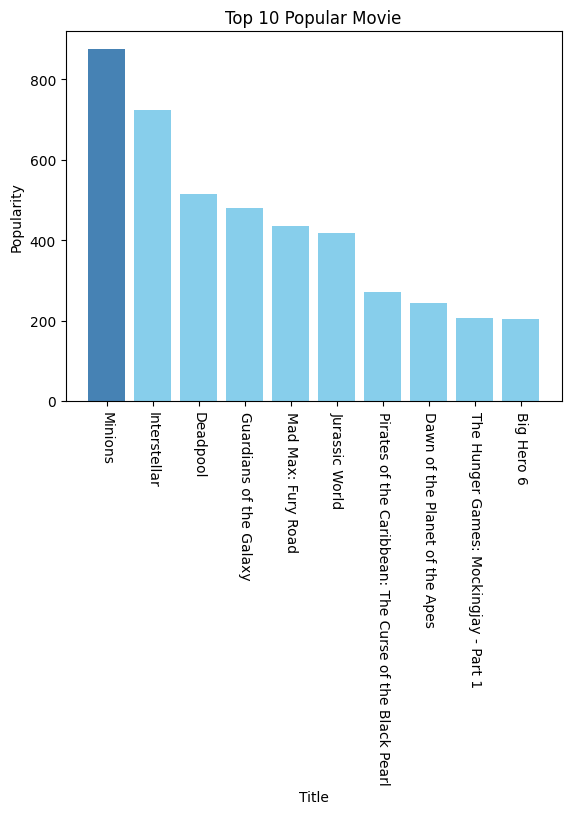

In [64]:
# Cari tahun terbanyak
max_pop = top_10.loc[top_10['popularity'].idxmax(), 'title']

# Tahun terbanyak
max_pop_bar = top_10['title'] == max_pop

# Bar Plot
plt.bar(top_10['title'], top_10['popularity'], color=np.where(max_pop_bar, 'steelblue', 'skyblue'))
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Movie')
plt.xticks(rotation=-90)
plt.show()

> **JENIS PLOT = BAR PLOT**

> **INSIGHT**

* Diperoleh insight bahwa Film dengan popularitas terbanyak adalah Minion dengan popularitas mencapai diatas 800 dibanding film lainnya.

# -> **3B - Insight Kedua**

Membuat Scatter Plot untuk membandingkan hubungan antara rata-rata vote dengan popularitas film

In [65]:
# Ambil Kolom
df_popularity = df_id[['popularity', 'vote_average']]

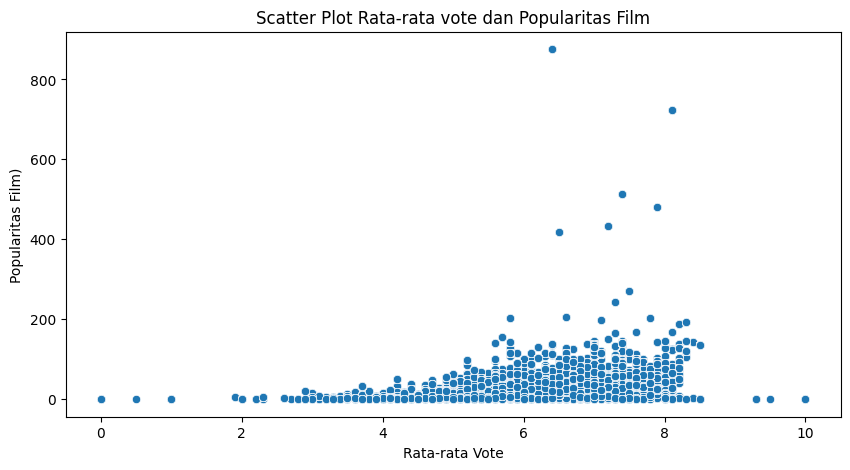

In [66]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_popularity, x='vote_average', y='popularity')
plt.title('Scatter Plot Rata-rata vote dan Popularitas Film')
plt.xlabel('Rata-rata Vote')
plt.ylabel('Popularitas Film)')
plt.show()

> **JENIS PLOT = SCATTER PLOT**

> **INSIGHT**

* Diperoleh insight bahwa semakin tinggi rata-rata vote (rating) sebuah film, cenderung semakin tinggi pula popularitasnya. Ini menunjukkan bahwa secara umum, film yang memiliki rating tinggi cenderung lebih populer di kalangan penonton

# -> **3B - Insight Ketiga**

Membuat histogram untuk mengetahui distribusi nilai popularitas film secara keseluruhan

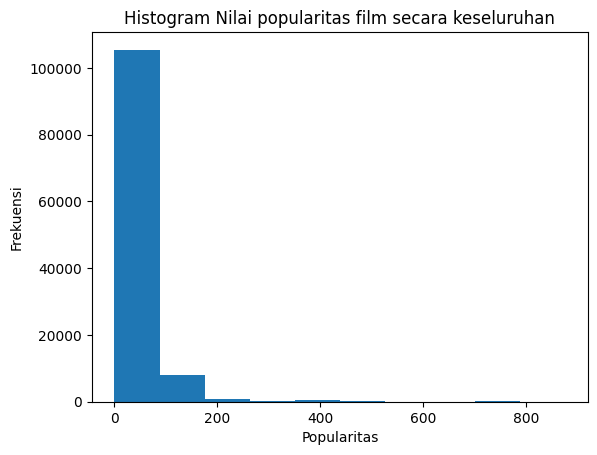

In [67]:
# Histogram
plt.hist(df_id['popularity'])
plt.xlabel('Popularitas')
plt.ylabel('Frekuensi')
plt.title('Histogram Nilai popularitas film secara keseluruhan')
plt.show()

> **JENIS PLOT = HISTOGRAM**

> **INSIGHT**

* Diperoleh insight bahwa distribusinya sangat condong ke kanan (right skewed). Yang berarti juga menunjukkan bahwa sebagian besar film hanya memiliki sedikit penayangan atau interaksi.

# **LEVEL 3 - C. F1 (JOIN)**

In [68]:
drivers = pd.read_csv("/kaggle/input/level3-c/drivers.csv")
races = pd.read_csv("/kaggle/input/level3-c/races.csv")
results = pd.read_csv('/kaggle/input/level3-c/results.csv')
sprint = pd.read_csv('/kaggle/input/level3-c/sprint_results.csv')
lap_times = pd.read_csv('/kaggle/input/level3-c/lap_times.csv')

In [69]:
#races_2021 = races[races['year']==2021]
#races_2021 = races_2021.merge(results, left_on='raceId', right_on='raceId', how='inner')
#races_2021 = races_2021.merge(drivers, left_on='driverId', right_on='driverId', how='inner')

In [70]:
# Join
ver = drivers[drivers['driverRef'] == 'max_verstappen']
ver = ver.merge(results, left_on='driverId', right_on='driverId', how='inner')
ver = ver.merge(races, left_on='raceId', right_on='raceId', how='inner')

In [71]:
# Ambil Kolom
sprint_ver = sprint[['raceId','driverId','points']]

# Rename
sprint_ver = sprint_ver.rename(columns={'points': 'sprint_points'})

In [72]:
# Join sprint
ver = pd.merge(ver, sprint_ver, on=['raceId', 'driverId'], how='left')

# Isi nilai NaN
ver['sprint_points'] = ver['sprint_points'].fillna(0)

# Total Poin
ver['total_points'] = ver['points'] + ver['sprint_points']

In [73]:
ver

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,url_x,resultId,...,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,sprint_points,total_points
0,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,22550,...,\N,\N,\N,\N,\N,\N,\N,\N,0.0,0.0
1,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,22562,...,\N,\N,\N,\N,\N,\N,\N,\N,0.0,6.0
2,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,22592,...,\N,\N,\N,\N,\N,\N,\N,\N,0.0,0.0
3,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,22613,...,\N,\N,\N,\N,\N,\N,\N,\N,0.0,0.0
4,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,22626,...,\N,\N,\N,\N,\N,\N,\N,\N,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,26430,...,2024-05-24,15:00:00,2024-05-25,10:30:00,2024-05-25,14:00:00,\N,\N,0.0,8.0
193,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,26445,...,2024-06-07,21:00:00,2024-06-08,16:30:00,2024-06-08,20:00:00,\N,\N,0.0,25.0
194,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,26465,...,2024-06-21,15:00:00,2024-06-22,10:30:00,2024-06-22,14:00:00,\N,\N,0.0,25.0
195,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,26489,...,2024-06-28,14:30:00,\N,\N,2024-06-29,14:00:00,2024-06-29,10:00:00,8.0,18.0


In [74]:
total = sum(ver['total_points'])

In [75]:
total

2841.5

In [76]:
ver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   driverId         197 non-null    int64  
 1   driverRef        197 non-null    object 
 2   number_x         197 non-null    object 
 3   code             197 non-null    object 
 4   forename         197 non-null    object 
 5   surname          197 non-null    object 
 6   dob              197 non-null    object 
 7   nationality      197 non-null    object 
 8   url_x            197 non-null    object 
 9   resultId         197 non-null    int64  
 10  raceId           197 non-null    int64  
 11  constructorId    197 non-null    int64  
 12  number_y         197 non-null    object 
 13  grid             197 non-null    int64  
 14  position         197 non-null    object 
 15  positionText     197 non-null    object 
 16  positionOrder    197 non-null    int64  
 17  points          

# -> **3C - Insight Pertama**

Membuat sebuah barplot mengetahui perolehan poin bang stepen setiap tahunnya

In [77]:
# Ambil Kolom
point_year = ver[['year', 'total_points']]

# Group By
total_points_year = point_year.groupby("year")["total_points"].sum()

# Dataframe
df_total_points = total_points_year.reset_index()

In [78]:
df_total_points

,year,total_points
0,2015,49.0
1,2016,204.0
2,2017,168.0
3,2018,249.0
4,2019,278.0
5,2020,214.0
6,2021,395.5
7,2022,454.0
8,2023,575.0
9,2024,255.0


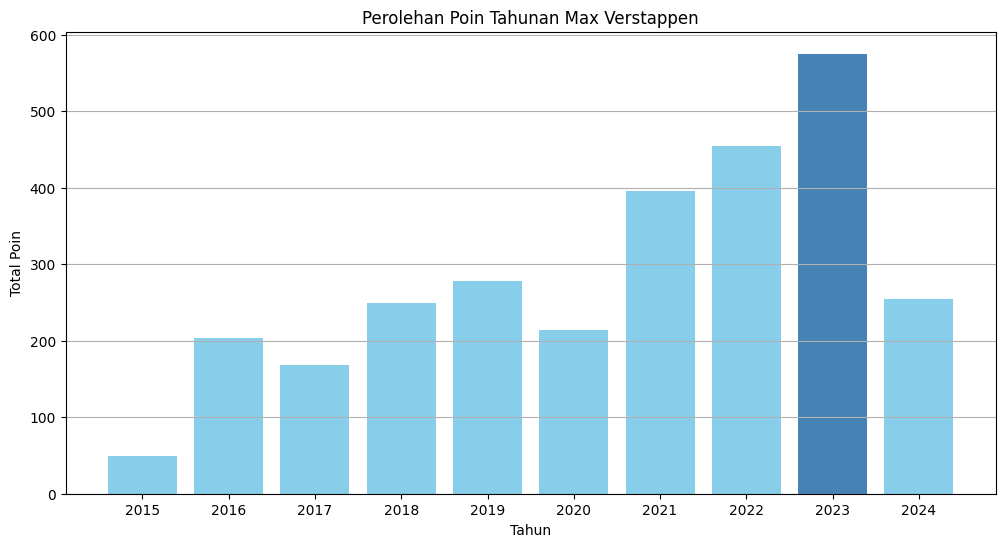

In [79]:
# Cari tahun terbanyak
max_year = df_total_points.loc[df_total_points['total_points'].idxmax(), 'year']

# Tahun terbanyak
max_year_bar = df_total_points['year'] == max_year

# Barplot
plt.figure(figsize=(12, 6))
plt.bar(df_total_points['year'], df_total_points['total_points'], color=np.where(max_year_bar, 'steelblue', 'skyblue'))
plt.xlabel('Tahun')
plt.ylabel('Total Poin')
plt.title('Perolehan Poin Tahunan Max Verstappen')
plt.xticks(ver['year'].unique())
plt.grid(axis='y')

#plt.annotate(max_year, (7, 10), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize=8)

plt.show()

> **JENIS PLOT = BAR PLOT**

> **INSIGHT**

* Diperoleh insight bahwa Max Verstappen memperoleh total poin terbanyak yaitu pada tahun 2023 sekaligus bisa dilihat juga bahwa setiap tahunnya Max total poin yang diperoleh tiap tahunnya cenderung mengalami kenaikan dibanding tahun-tahun sebelumnya.

# -> **3C - Insight Kedua**

Membuat sebuah Lineplot Posisi Finish Max Verstappen Berdasarkan Riwayat Balapan pada tahun 2023

In [80]:
# Ambil Kolom
races_2023 = ver[ver['year'] == 2023]
races_2023 = races_2023[['year', 'name', 'date', 'positionOrder']]

In [81]:
races_2023

,year,name,date,positionOrder
163,2023,Bahrain Grand Prix,2023-03-05,1
164,2023,Saudi Arabian Grand Prix,2023-03-19,2
165,2023,Australian Grand Prix,2023-04-02,1
166,2023,Azerbaijan Grand Prix,2023-04-30,2
167,2023,Miami Grand Prix,2023-05-07,1
168,2023,Monaco Grand Prix,2023-05-28,1
169,2023,Spanish Grand Prix,2023-06-04,1
170,2023,Canadian Grand Prix,2023-06-18,1
171,2023,Austrian Grand Prix,2023-07-02,1
172,2023,British Grand Prix,2023-07-09,1


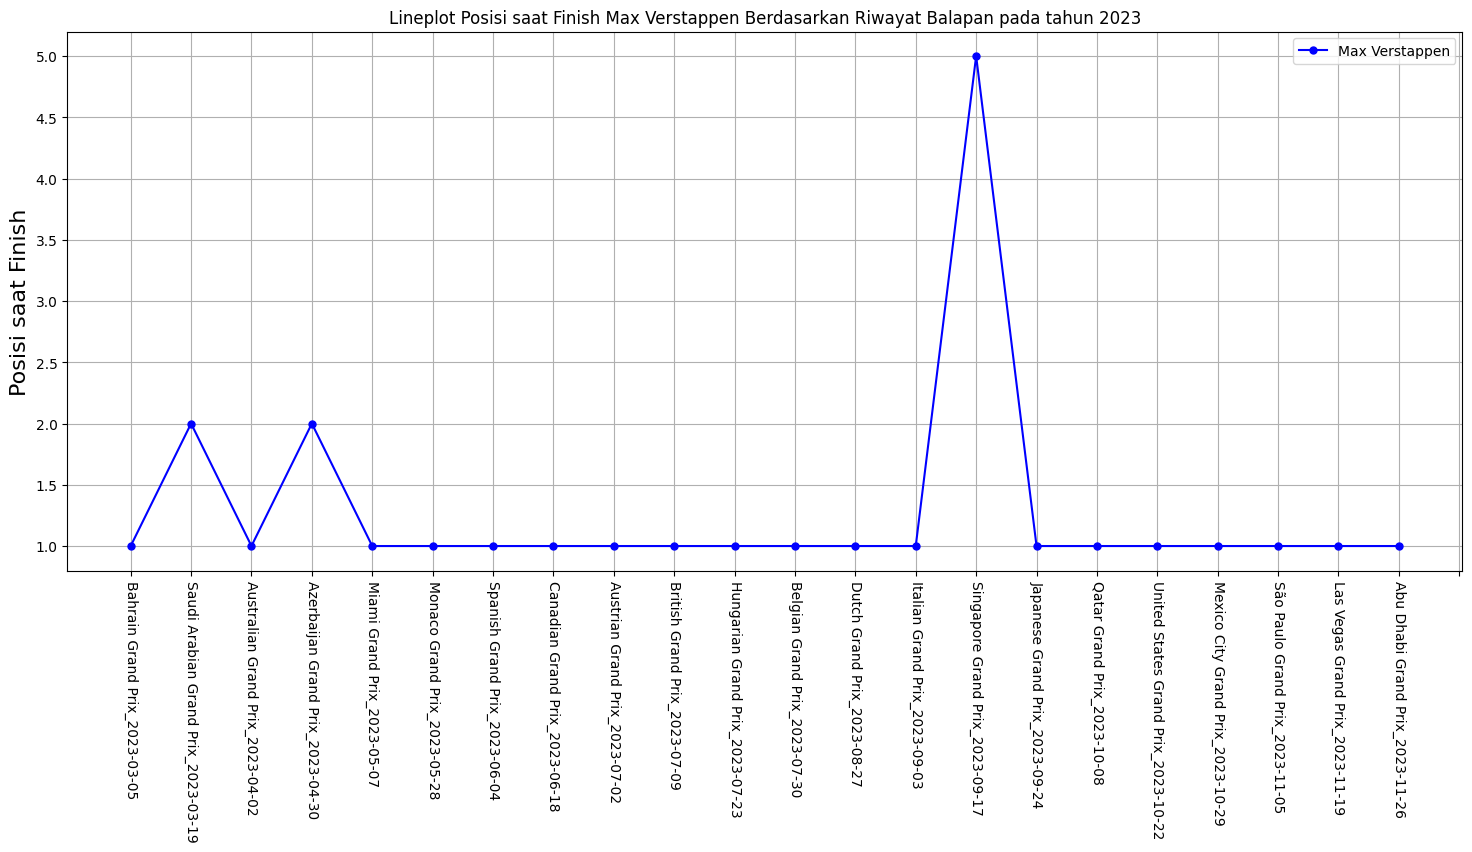

<Figure size 640x480 with 0 Axes>

In [82]:
names = []
i = 0
n = 0

for i, n in zip(races_2023['name'], races_2023['date']):
    names.append(i + '_' + n)
    
plt.figure(figsize=(18,7))
plt.plot(names, races_2023['positionOrder'], label='Max Verstappen', color='blue', marker='o', markersize=5)
plt.ylabel('Posisi saat Finish', fontsize=16)
plt.xticks(range(0,23))
plt.xticks(rotation=-90)
plt.title('Lineplot Posisi saat Finish Max Verstappen Berdasarkan Riwayat Balapan pada tahun 2023')
plt.legend()
plt.grid()
plt.show()
plt.clf()

> **JENIS PLOT = LINE PLOT**

> **INSIGHT**

* Diperoleh insight bahwa Max Verstappen secara berturut-turut memperoleh posisi nomor 1 pada Grand Prix dari tanggal 2023-05-07 sampai dengan 2023-09-03. Serta mengalami penurunan posisi yang cukup ekstrim yaitu dari posisi 1 menjadi 5 pada saat Singapore Grand Prix pada 2023-09-17.

# -> **3C - Insight Ketiga**

Membuat sebuah Scatter Plot Posisi Start dan Posisi Finish dengan skala seluruh driver

In [83]:
# Join ALL
df_all_driver = drivers
df_all_driver = df_all_driver.merge(results, left_on='driverId', right_on='driverId', how='inner')
df_all_driver = df_all_driver.merge(races, left_on='raceId', right_on='raceId', how='inner')

# Ambil Kolom
sprint = sprint[['raceId','driverId','points']]

# Rename
sprint = sprint.rename(columns={'points': 'sprint_points'})

# Join sprint
df_all_driver = pd.merge(df_all_driver, sprint, on=['raceId', 'driverId'], how='left')

# Isi nilai NaN
df_all_driver['sprint_points'] = df_all_driver['sprint_points'].fillna(0)

# Total Poin
df_all_driver['total_points'] = df_all_driver['points'] + df_all_driver['sprint_points']

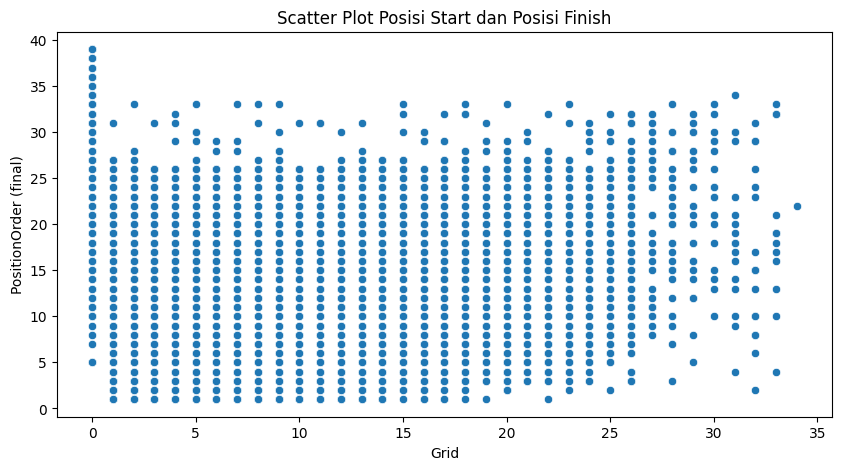

In [84]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_all_driver, x='grid', y='positionOrder')
plt.title('Scatter Plot Posisi Start dan Posisi Finish')
plt.xlabel('Grid')
plt.ylabel('PositionOrder (final)')
plt.show()

> **JENIS PLOT = SCATTER PLOT**

> **INSIGHT**

* Diperoleh insight bahwa terlihat korelasi positif antara kolom posisi awal (Grid) dan posisi akhir (PositionOrder). Hal ini menunjukkan bahwa pembalap yang memulai balapan di posisi yang jauh cenderung mendapat posisi yang jauh juga saat finish.

# **LEVEL 4 - A. BIG HAPPINESS !!!**

In [85]:
import plotly.express as px

In [86]:
df_4A = pd.read_csv("/kaggle/input/level4a/2018.csv")

In [87]:
df_4A

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [88]:
fig = px.parallel_coordinates(df_4A, color="Overall rank", dimensions=['Score', 'GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
                              color_continuous_scale=px.colors.diverging.Tealrose)

fig.update_layout(
    title="Negara Biru : rank 1-60 | Negara Kuning : rank 60-100 | Negara Merah : rank 100+",
    title_x=0.5,  # Posisi horizontal di tengah
    title_y=0.03,  # Posisi vertikal dekat bagian atas
    title_xanchor="center"  # Jangkar di tengah secara horizontal
)

fig.show()

> **JENIS PLOT = PARALLEL COORDINATOR PLOT**

> **INSIGHT**

* Pertama-tama agar mempermudah mencari insight, saya membagi menjadi 3 kategori yaitu : 

**Negara Biru : rank 1-60 | Negara Kuning : rank 60-100 | Negara Merah : rank 100+**

* Diperoleh insight bahwa terlihat korelasi positif yang kuat pada Negara Biru pada beberapa faktor yang ada, namun dapat dilihat juga pada Negara Merah pada beberapa negara tersebut cenderung mengalami korelasi yang kurang bagus dimana hal tersebut bisa dilihat dari banyaknya garis yang menyilang (cross) yang menandakan adanya korelasi negatif pada beberapa variabel. Serta pada negara kuning itu korelasinya sama serta mengelompok dengan negara biru.

# **LEVEL 4 - B. GEO PANDAS !!!**

In [89]:
import geopandas as gpd

In [90]:
# Panggil Dataset
df_EP = pd.read_csv("/kaggle/input/level4-b/chipotle_stores.csv")
peta = gpd.read_file("/kaggle/input/level4-b/usa-states-census-2014.shp")

DriverError: Unable to open /kaggle/input/level4-b/usa-states-census-2014.shx or /kaggle/input/level4-b/usa-states-census-2014.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [ ]:
peta